In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family'] = 'sans-serif'
matplotlib.rcParams['axes.unicode_minus'] = False

In [4]:
import arch
from statsmodels.tsa import stattools 
from statsmodels.graphics.tsaplots import *
from arch.unitroot import ADF
import math

In [5]:
path = '../YCdata/TRD_Index.txt'
data = pd.read_table(path,sep='\t',index_col='Trddt')
data

,Indexcd,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
Trddt,,,,,,,
2014/1/2,1,4,2112.126,2113.110,2101.016,2109.387,-0.003115
2014/1/3,1,5,2101.542,2102.167,2075.899,2083.136,-0.012445
2014/1/6,1,1,2078.684,2078.684,2034.006,2045.709,-0.017967
2014/1/7,1,2,2034.224,2052.279,2029.246,2047.317,0.000786
2014/1/8,1,3,2047.256,2062.952,2037.110,2044.340,-0.001454
...,...,...,...,...,...,...,...
2015/4/8,399903,3,3911.265,3972.410,3870.373,3964.860,0.018826
2015/4/9,399903,4,3987.818,4027.243,3904.136,3934.731,-0.007599
2015/4/10,399903,5,3922.880,4007.416,3903.789,4000.756,0.016780


In [7]:
SHindex = data[data.Indexcd ==1]
SHindex.index = pd.to_datetime(SHindex.index)
SHindex

,Indexcd,Daywk,Opnindex,Hiindex,Loindex,Clsindex,Retindex
Trddt,,,,,,,
2014-01-02,1,4,2112.126,2113.110,2101.016,2109.387,-0.003115
2014-01-03,1,5,2101.542,2102.167,2075.899,2083.136,-0.012445
2014-01-06,1,1,2078.684,2078.684,2034.006,2045.709,-0.017967
2014-01-07,1,2,2034.224,2052.279,2029.246,2047.317,0.000786
2014-01-08,1,3,2047.256,2062.952,2037.110,2044.340,-0.001454
...,...,...,...,...,...,...,...
2015-04-08,1,3,3976.532,4000.220,3903.648,3994.811,0.008440
2015-04-09,1,4,4006.130,4016.396,3900.027,3957.534,-0.009331
2015-04-10,1,5,3947.492,4040.348,3929.319,4034.310,0.019400


In [8]:
SHRet = SHindex.Retindex
SHRet

Trddt
2014-01-02   -0.003115
2014-01-03   -0.012445
2014-01-06   -0.017967
2014-01-07    0.000786
2014-01-08   -0.001454
                ...   
2015-04-08    0.008440
2015-04-09   -0.009331
2015-04-10    0.019400
2015-04-13    0.021665
2015-04-14    0.003360
Name: Retindex, Length: 311, dtype: float64

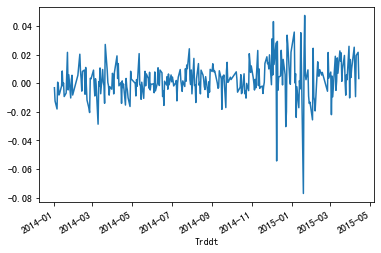

In [9]:
SHRet.plot()

In [10]:
acfs = stattools.acf(SHRet)
acfs[:5]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([ 1.        ,  0.03527714, -0.01178861, -0.02953388,  0.16043181])

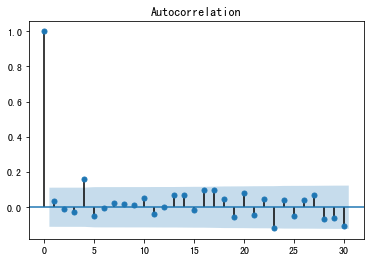

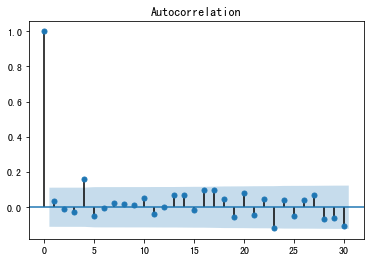

In [11]:
plot_acf(SHRet,use_vlines=True,lags=30) #绘制自相关图

In [12]:
pacfs = stattools.pacf(SHRet)
pacfs[:5]


array([ 1.        ,  0.03539094, -0.01313388, -0.02897258,  0.16483494])

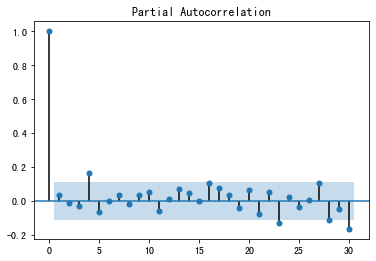

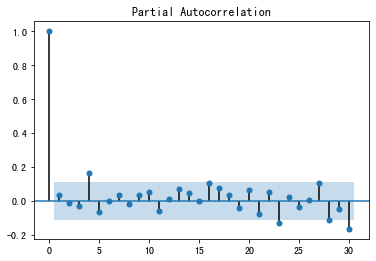

In [13]:
plot_pacf(SHRet,use_vlines=True,lags=30) 

Text(0.5, 1.0, '2014-2015收盘指数时序')

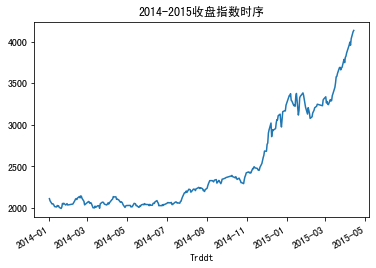

In [14]:
SHclose = SHindex.Clsindex
SHclose.plot()
plt.title('2014-2015收盘指数时序')

Text(0.5, 1.0, '2014-2015上证指数的时序图')

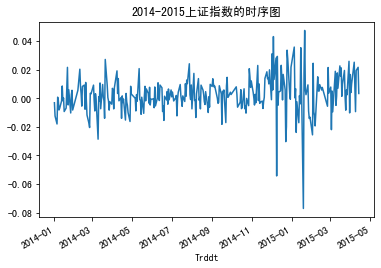

In [17]:
SHRet.plot()
plt.title('2014-2015上证指数的时序图')

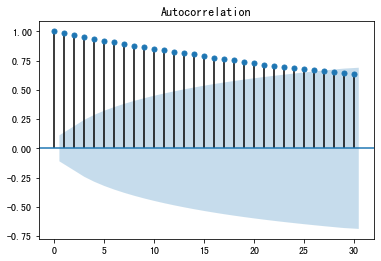

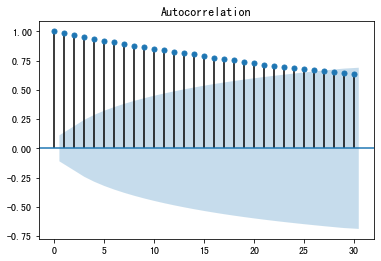

In [18]:
plot_acf(SHclose,use_vlines=True,lags=30) 

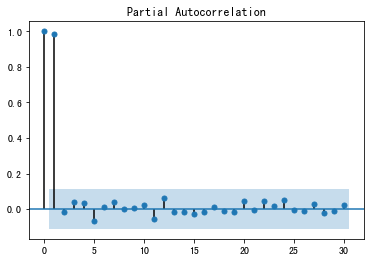

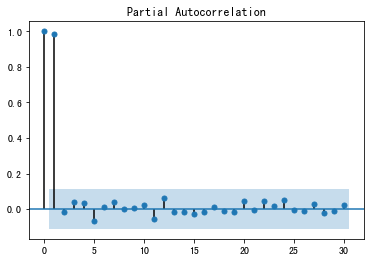

In [19]:
plot_pacf(SHclose,use_vlines=True,lags=30) 

In [20]:
adfSHRET = ADF(SHRet)
print(adfSHRET.summary().as_text())

   Augmented Dickey-Fuller Results   
Test Statistic                 -7.559
P-value                         0.000
Lags                                3
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [21]:
adfSHclose = ADF(SHclose)
print(adfSHclose.summary().as_text()) #ADF 判断波动是否平稳

   Augmented Dickey-Fuller Results   
Test Statistic                  2.549
P-value                         0.999
Lags                                4
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


In [22]:
whitenoise = np.random.standard_normal(size = 50)
whitenoise

array([ 2.94320639,  0.75379867, -1.20968321,  0.99903353, -0.98687966,
        1.25196162,  1.83687895, -0.71084441,  0.96195994,  0.78070449,
       -1.65955447, -0.62001754,  0.49592398,  0.99368592, -0.27465156,
        0.75069263, -0.05636348,  0.45239966, -0.51716974,  1.04399975,
       -1.2562471 , -0.41561229,  0.83065979,  0.16841692,  0.46261995,
       -0.41514802, -0.14135946, -1.51132547,  0.06683209,  0.42687107,
       -2.22200744, -0.38947078, -1.99278728,  0.68469795, -0.00304801,
        0.81612853,  1.65491339, -0.38764166, -0.37088611,  0.37414745,
        1.83819609, -1.17291612,  0.58620236,  0.28998357,  1.27490842,
       -1.345261  ,  0.75166641, -0.00595954,  1.12627427,  0.236002  ])

Text(0.5, 1.0, '白噪声')

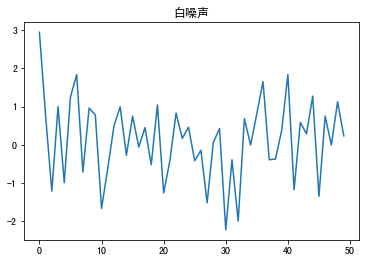

In [23]:
plt.plot(whitenoise)
plt.title('白噪声')

In [24]:
box1 = stattools.q_stat(stattools.acf(SHRet)[1:13],len(SHRet))
box1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


(array([ 0.39077768,  0.43455722,  0.7102307 ,  8.87130492,  9.68869854,
         9.69861023,  9.90782614, 10.00770409, 10.05187169, 10.90544768,
        11.41474472, 11.41630878]),
 array([0.53189091, 0.80470574, 0.87079499, 0.06439799, 0.08455194,
        0.13793151, 0.19385734, 0.26448561, 0.34630225, 0.36493184,
        0.40919934, 0.4936175 ]))

In [25]:
box1[1][-2] #取最后一个数据

0.409199337510353

In [27]:
box2 = stattools.q_stat(stattools.acf(SHclose)[1:13],len(SHclose))
box2